### Simulation Case2

In [10]:
%store -r r1_series_value
%store -r r2_series_value
%store -r vx_chosen
%store -r vref
%store -r rg
%store -r rf
%store -r x1
%store -r x2

%store -r y1
%store -r y2

r1_series_value=r1_series_value
r2_series_value=r2_series_value
vx_chosen=vx_chosen
vref=vref
rg=rg
rf=rf
x1=x1
x2=x2
rf,rg,r1_series_value,r2_series_value,vx_chosen,vref,x1,x2


In [11]:
#Specify Amplitude and DC-Offset for Input signal
amplitude=abs(float(x1)-float(x2))/2
dc_offset=amplitude

In [12]:
%matplotlib inline
# %pip install sympy numpy pyspice import-ipynb
#dill.load_session(session_file_name)
import sympy as sp

# Importing packages
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown as md


sp.init_printing()



In [13]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import SubCircuit,Circuit, SubCircuitFactory
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *

from pathlib import Path
libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

Set Offset and Amplitude in SIN function

In [14]:
circuit = Circuit('Case2')
circuit.include('./spice-libs/TL072.302')

circuit.V(1, 'Vcc', circuit.gnd, 'dc 12' )
circuit.V(2, 'Vee',circuit.gnd, 'dc -12' )
circuit.V(3, 'Vx', circuit.gnd, 'dc 12' )
circuit.V(4, 'Vin', circuit.gnd, f'SIN({dc_offset},{amplitude},1000)' )


circuit.R(1, 'Vx', 'u1_plus', 2000)
circuit.R(2, 'u1_plus',circuit.gnd, 770)

#Rg
circuit.R(3, 'u1_out', 'u2_minus', 20000)
#Rf
circuit.R(4, 'u2_minus','u2_out', 60000)
#Rout
circuit.R(5, 'u2_out', 'Vout',1000)
#1out 1in- 1in+ vcc- 2in+ 2in- 2out vcc+
circuit.X(1, 'TL072', 'u1_out','u1_out','u1_plus','Vee','Vin','u2_minus','u2_out','Vcc')

#set calculated values
circuit.V3.dc_value=vx_chosen
circuit.R1.resistance=r1_series_value
circuit.R2.resistance=r2_series_value
circuit.R3.resistance=rg.evalf()
circuit.R4.resistance=rf
simulator = circuit.simulator()


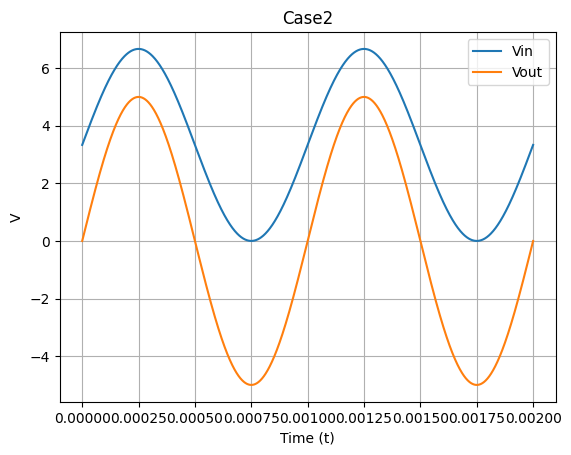

In [15]:
analysis = simulator.transient(step_time=1@u_us, end_time=2@u_ms)

plt.plot(analysis.time,analysis.Vin, label='Vin')
plt.plot(analysis.time,analysis.Vout, label='Vout')

plt.title('Case2')
plt.xlabel('Time (t)')
plt.ylabel('V')
plt.legend()
plt.grid()

In [16]:
analysis.Vout.max(),analysis.Vout.min()

(WaveForm  4.999847699807425@V, WaveForm  -4.999769172775316@V)

In [17]:
analysis.Vin.max(),analysis.Vin.min()

(WaveForm  6.666650883138333@V, WaveForm  1.578352833186969e-05@V)

<div>
<img src="images/case2.png" width="500"/>
</div>


In [18]:
md(f"### $ R_f={rf:.0f}\Omega,R_g={rg:.0f} R_1={r1_series_value:.0f}\Omega,R_2={r2_series_value:.0f}\Omega,V_x={vx_chosen}V,V_ref={vref:.3f}V$")


### $ R_f=100000\Omega,R_g=200000 R_1=15000\Omega,R_2=75000\Omega,V_x=12V,V_ref=10.000V$